----------
**Amazon Sales Data - Analysis**
=====================================

- <a href='#1'>1. Load libraries and read the data</a>  
    - <a href='#1.1'>1.1. Load libraries</a> 
    - <a href='#1.2'>1.2. Read the data</a> 
    - <a href='#1.3'>1.3. Missing values</a> 

- <a href='#2'>2. Feature engineering and selection</a>
    - <a href='#2.1'>2.1. Checking for anomalies</a>
    - <a href='#2.2'>2.2. Creating new variable</a>
    - <a href='#2.3'>2.3. Feature Encoding</a>
    - <a href='#2.4'>2.4. Drop redundant features</a>
    - <a href='#2.5'>2.5. Feature Scaling</a>

- <a href='#3'>3. Exploratory Data Analysis (EDA)</a>
    - <a href='#3.1'>3.1. Histograms</a>
    - <a href='#3.2'>3.2. Correlation Heatmap</a>

# <a id='1'>1. Load libraries and read the data</a>

## <a id='1.1'>1.1. Load libraries</a> 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

## <a id='1.2'>1.2. Read the data</a>  

In [3]:
df = pd.read_csv('D:/unified mentor/um inside/Amazon Sales data.csv')

In [4]:
#Check for the first five rows of the dataset
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [5]:
#Rows and columns of the dataset
df.shape
# There are 100 rows and 14 columns

(100, 14)

In [ ]:
df.describe().T

## <a id='1.3'>1.3. Missing values</a>  

In [6]:
print(f'The number of null values in the dataset is {df.isnull().sum().sum()}')

The number of null values in the dataset is 0


In [7]:
print(f'The number of duplicated rows in the dataset is {df.duplicated().sum()}')

The number of duplicated rows in the dataset is 0


# <a id='2'>2. Feature engineering and selection</a>

## <a id='2.1'>2.1. Checking for anomalies</a>

In [8]:
cat_var = ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority']

In [9]:
# Lets check for the number of each of the labels in the categorical variables.
# This is also helpful to check for any redundant or anomaly in the data.

for index in range(2,5):
    vc = df[cat_var[index]].value_counts()
    print(vc, '\n')

Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: Item Type, dtype: int64 

Offline    50
Online     50
Name: Sales Channel, dtype: int64 

H    30
L    27
C    22
M    21
Name: Order Priority, dtype: int64 



## <a id='2.2'>2.2. Creating new variable</a>

In [10]:
#Lets convert the order date and ship date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [11]:
# Adding a new feature 'Days Shipping' to the dataset 'df' which calculates the number of days for the order to ship.
df['Days Shipping'] = df['Ship Date'] - df['Order Date']

## <a id='2.3'>2.3. Feature Encoding</a>

In [12]:
df['Sales Channel'] = df['Sales Channel'].str.replace('Offline', '0')
df['Sales Channel'] = df['Sales Channel'].str.replace('Online', '1')

In [13]:
df['Order Priority'] = df['Order Priority'].str.replace('C', '0')
df['Order Priority'] = df['Order Priority'].str.replace('L', '1')
df['Order Priority'] = df['Order Priority'].str.replace('M', '2')
df['Order Priority'] = df['Order Priority'].str.replace('H', '3')

In [14]:
df[['Sales Channel', 'Order Priority']] = df[['Sales Channel', 'Order Priority']].astype(int)

In [15]:
# Encoding a categorical variable using categorical encoder
for feature in cat_var:
    if feature == 'Item Type':
        print('\n')
        print('feature:', feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Item Type
['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household', ..., 'Clothes', 'Cosmetics', 'Beverages', 'Meat', 'Snacks']
Length: 12
Categories (12, object): ['Baby Food', 'Beverages', 'Cereal', 'Clothes', ..., 'Office Supplies', 'Personal Care', 'Snacks', 'Vegetables']
[ 0  2  8  5  6 11  9  3  4  1  7 10]


## <a id='2.4'>2.4. Drop redundant features</a>

In [16]:
# Dropping some redundant features
df.drop(['Country', 'Region', 'Order ID', 'Ship Date', 'Order Date'], axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Item Type       100 non-null    int8           
 1   Sales Channel   100 non-null    int32          
 2   Order Priority  100 non-null    int32          
 3   Units Sold      100 non-null    int64          
 4   Unit Price      100 non-null    float64        
 5   Unit Cost       100 non-null    float64        
 6   Total Revenue   100 non-null    float64        
 7   Total Cost      100 non-null    float64        
 8   Total Profit    100 non-null    float64        
 9   Days Shipping   100 non-null    timedelta64[ns]
dtypes: float64(5), int32(2), int64(1), int8(1), timedelta64[ns](1)
memory usage: 6.5 KB


## <a id='2.5'>2.5. Feature Scaling</a>

In [18]:
# Selecting specific numerical type data from the dataset for scaling.
num_dtypes = df.select_dtypes(['int8', 'int32', 'int64', 'float64'])

In [19]:
# Scaling the data using z-score
df[num_dtypes.columns] = num_dtypes.apply(zscore)

In [20]:
df.head()
# Data is scaled. The value range lies in the range -1 to +1.

,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Days Shipping
0,-1.617958,-1.0,1.245352,1.724988,-0.091639,-0.168895,0.798622,0.603092,1.168192,30 days
1,-0.987175,1.0,-1.404333,-0.836083,-0.303148,-0.394831,-0.548427,-0.559505,-0.442948,24 days
2,0.905174,-1.0,-0.521105,-1.204725,1.597400,1.783101,-0.147989,0.001945,-0.497510,6 days
3,-0.041001,1.0,-1.404333,1.069345,-1.140863,-0.983250,-0.893431,-0.811994,-0.967494,15 days
4,0.905174,-1.0,-0.521105,-0.023992,1.597400,1.783101,1.323690,1.599939,0.452390,5 days


# <a id='3'>3. Exploratory Data Analysis (EDA)</a>

In [22]:
df.describe().T

# This description of the data is the proof that after normalization the data revolves 
# around mean of value zero and standard deviation of value of 1.

,count,mean,std,min,25%,50%,75%,max
Item Type,100.0,0.0,1.005038,-1.617958,-0.671784,-0.041001,0.905174,1.851348
Sales Channel,100.0,0.0,1.005038,-1.0,-1.0,0.0,1.0,1.0
Order Priority,100.0,-0.0,1.005038,-1.404333,-0.521105,0.362124,1.245352,1.245352
Units Sold,100.0,-0.0,1.005038,-1.799947,-0.824484,0.091276,0.805721,1.724988
Unit Price,100.0,-0.0,1.005038,-1.140863,-0.832005,-0.413296,0.684432,1.670178
Unit Cost,100.0,0.0,1.005038,-0.98325,-0.828816,-0.447351,0.385988,1.783101
Total Revenue,100.0,-0.0,1.005038,-0.942113,-0.760486,-0.427596,0.577236,3.182718
Total Cost,100.0,-0.0,1.005038,-0.86063,-0.707403,-0.526877,0.632416,3.317545
Total Profit,100.0,0.0,1.005038,-1.00936,-0.73392,-0.345864,0.444944,2.929461
Days Shipping,100,23 days 08:38:24,14 days 17:49:19.419899149,0 days 00:00:00,9 days 18:00:00,23 days 12:00:00,36 days 06:00:00,50 days 00:00:00


## <a id='3.1'>3.1. Histograms</a> 

In [23]:
num_var = ['Units Sold','Unit Price','Unit Cost','Total Revenue','Total Cost','Total Profit']

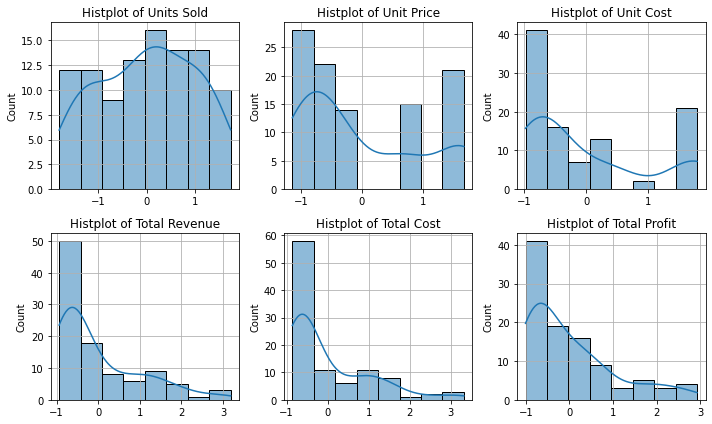

In [25]:
plt.figure(figsize=(10,6))
for i, column in enumerate(num_var):
    plt.subplot(2, 3, i+1)
    sns.histplot(x=df[column], kde=True)
    plt.title(f'Histplot of {column}')
    plt.grid(True)
    plt.xlabel('') # Remove the x axis label
    plt.tight_layout()

## <a id='3.2'>3.2. Correlation Heatmap</a> 

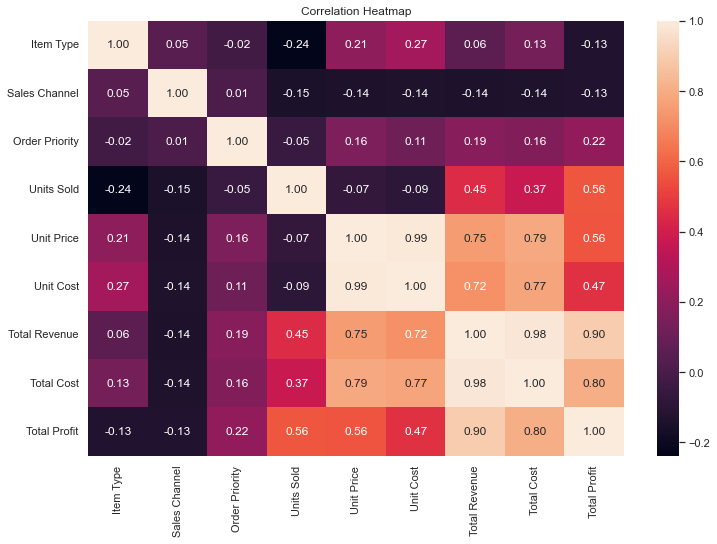

In [26]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1)
sns.heatmap(df.corr(), fmt='.2f', annot=True)
plt.title('Correlation Heatmap')
plt.show()

# The variables like  
# (1) 'Unit Cost', 'Unit Price' (correlation=0.99)
# (2) 'Total Cost', 'Total Revenue' (correlation=0.98)
# (3) 'Total Cost', 'Total Profit' (correlation=0.80)
# (4) 'Total Profit', 'Total Revenue' (correlation=0.90) 
# (5) 'Total Cost', 'Unit Price' (correlation=0.79) have very high correlation with each other.
# These variables should be removed from the dataset by analysing the Variation Inflation Factor
# of the variables or else they might affect the accuracy and prediction of the ML model.

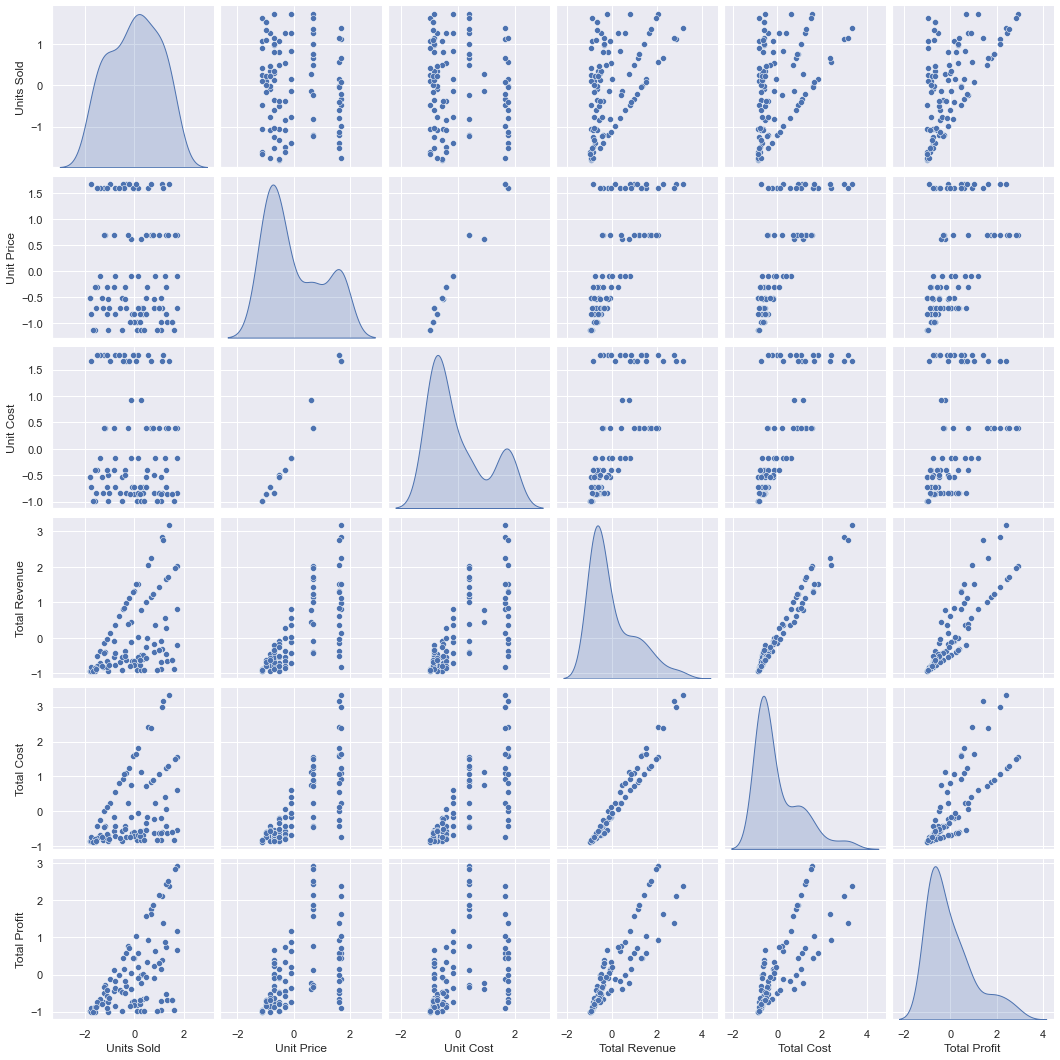

In [27]:
var_pplot = ['Units Sold','Unit Price','Unit Cost','Total Revenue','Total Cost','Total Profit','Days Shipping']
sns.pairplot(df[var_pplot], diag_kind='kde')

# The kde plot for Unit Price and Unit Cost have bimodal curve which means they do not have normal distributions rather
# they have two modes within the same dataset.